## CLIM 680 Final Project: Looking at the Anomalies for the Sea Surface Temperature and Sea Surface Salinity from 2001 to 2024.

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import tarfile
import pandas as pd
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as feature
from cartopy.util import add_cyclic_point

/home/jwill96/miniforge/envs/climate/lib/python3.12/site-packages/pyproj/__init__.py:95: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


### The following data is the NOAA ERSST V5 SST anomalies for Nino 3.4. 
##### Nino 3.4 is the SST for the East Central Tropical Pacific. 
https://www.cpc.ncep.noaa.gov/data/indices/ersst5.nino.mth.91-20.ascii
https://climatedataguide.ucar.edu/climate-data/nino-sst-indices-nino-12-3-34-4-oni-and-tni

In [3]:
ds = pd.read_csv('nina34.data.txt', header=None, delim_whitespace=True, index_col = 0)
#ds

/tmp/ipykernel_2126630/2105098720.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  ds = pd.read_csv('nina34.data.txt', header=None, delim_whitespace=True, index_col = 0)


In [4]:
ds.columns = ['Jan','Feb','March','April','May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'] 
ds = ds.rename_axis('Year')
#ds

In [5]:
# Calculate the mean for each column and group by each month
ds.groupby('Year').mean()

,Jan,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec
Year,,,,,,,,,,,,
2001,25.81,26.12,26.80,27.33,27.60,27.54,27.25,26.80,26.52,26.57,26.33,26.19
2002,26.39,26.71,27.29,27.84,28.24,28.44,28.03,27.72,27.81,27.96,28.17,27.97
2003,27.15,27.39,27.65,27.68,27.32,27.44,27.50,27.11,26.99,27.14,27.04,27.03
2004,26.81,26.98,27.40,27.89,28.00,27.86,27.78,27.62,27.53,27.44,27.36,27.34
2005,27.21,27.11,27.73,28.08,28.24,27.77,27.06,26.80,26.68,26.65,26.11,25.68
2006,25.63,26.08,26.57,27.50,27.85,27.73,27.30,27.16,27.32,27.41,27.69,27.74
2007,27.24,26.88,27.10,27.50,27.46,27.37,26.71,26.14,25.61,25.32,25.17,25.01
2008,24.86,25.08,26.07,26.83,27.09,27.04,26.99,26.72,26.47,26.37,26.25,25.74
2009,25.66,25.96,26.59,27.47,27.99,28.04,27.78,27.42,27.40,27.60,28.16,28.34


Text(0, 0.5, 'Nino 3.4 Average SST')

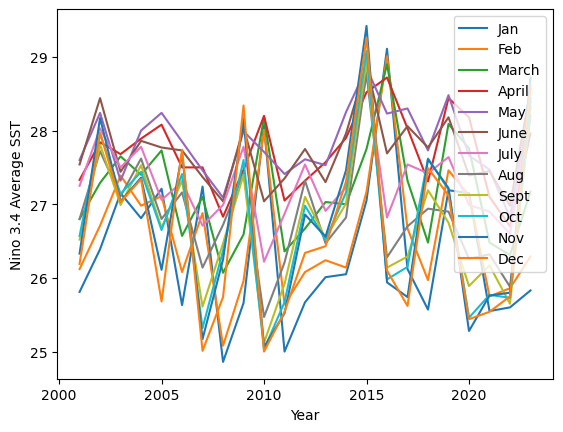

In [6]:
ds.plot()
plt.ylabel('Nino 3.4 Average SST')

In [7]:
year_mean = ds.mean(axis=1)
#year_mean

In [ ]:
year_mean.plot()
plt.title('The Average SST for Nino 3.4')
plt.ylabel('Average SST')

In [9]:
avg_per_month = np. mean(ds, axis=0)
avg_per_month

Jan      26.379565
Feb      26.596522
March    27.160870
April    27.700870
May      27.836087
June     27.722609
July     27.310870
Aug      26.871739
Sept     26.754348
Oct      26.750000
Nov      26.749130
Dec      26.634783
dtype: float64

Text(0.5, 1.0, 'Monthly Average SST for Nino 3.4')

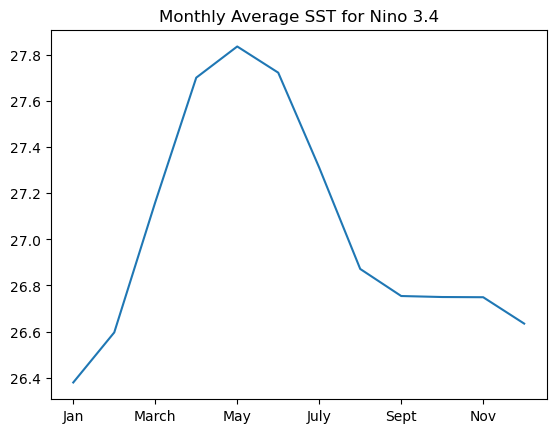

In [10]:
avg_per_month.plot()

plt.title('Monthly Average SST for Nino 3.4')

In [17]:
da_year = xr.DataArray.from_series(year_mean)
da_year

<xarray.DataArray (Year: 23)> Size: 184B
array([26.73833333, 27.71416667, 27.28666667, 27.50083333, 27.09333333,
       27.165     , 26.45916667, 26.2925    , 27.3675    , 26.5925    ,
       26.21166667, 26.93666667, 26.75916667, 27.19083333, 28.53916667,
       27.41      , 26.87833333, 27.09166667, 27.55583333, 26.715     ,
       26.355     , 26.14      , 27.9025    ])
Coordinates:
  * Year     (Year) int64 184B 2001 2002 2003 2004 2005 ... 2020 2021 2022 2023

In [18]:
mean_value = da_year.mean()
mean_value

<xarray.DataArray ()> Size: 8B
np.float64(27.038949275362324)

In [19]:
anomaly = da_year - mean_value
anomaly 

<xarray.DataArray (Year: 23)> Size: 184B
array([-0.30061594,  0.67521739,  0.24771739,  0.46188406,  0.05438406,
        0.12605072, -0.57978261, -0.74644928,  0.32855072, -0.44644928,
       -0.82728261, -0.10228261, -0.27978261,  0.15188406,  1.50021739,
        0.37105072, -0.16061594,  0.05271739,  0.51688406, -0.32394928,
       -0.68394928, -0.89894928,  0.86355072])
Coordinates:
  * Year     (Year) int64 184B 2001 2002 2003 2004 2005 ... 2020 2021 2022 2023

In [20]:
positive=anomaly.where(anomaly>0.5) 
negative=anomaly.where(anomaly<-0.5)
neutral=anomaly.where((anomaly>-0.5) & (anomaly<0.5))
negative

<xarray.DataArray (Year: 23)> Size: 184B
array([        nan,         nan,         nan,         nan,         nan,
               nan, -0.57978261, -0.74644928,         nan,         nan,
       -0.82728261,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
       -0.68394928, -0.89894928,         nan])
Coordinates:
  * Year     (Year) int64 184B 2001 2002 2003 2004 2005 ... 2020 2021 2022 2023

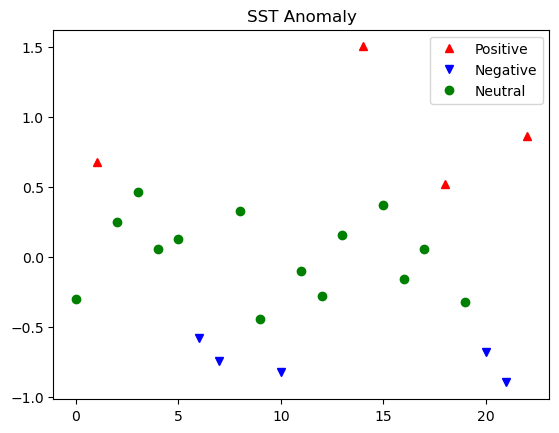

In [21]:
plt.plot(positive, marker = '^', color = 'red', linestyle = 'none', label = 'Positive')
plt.plot(negative,'bv', label = 'Negative')
plt.plot(neutral,'go', label = 'Neutral')
plt.title('SST Anomaly')
plt.legend()

Positive:  4
Neutral:  14
Negative:  5
[array(4), array(5), array(14)]


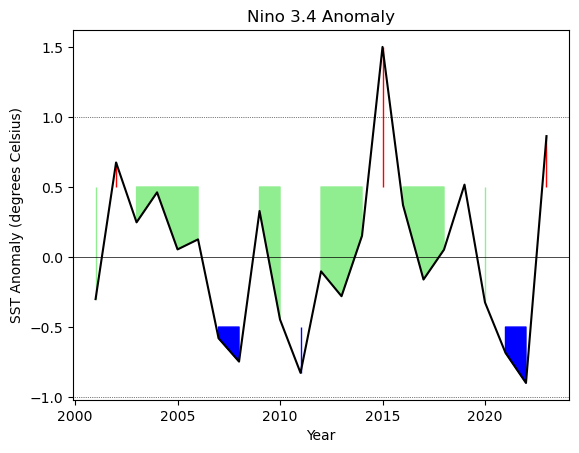

In [23]:
 print('Positive: ',positive.count(dim='Year').values)
print('Neutral: ',neutral.count(dim='Year').values)
print('Negative: ',negative.count(dim='Year').values)

counts=[positive.count(dim='Year').values,
        negative.count(dim='Year').values,
        neutral.count(dim='Year').values]
print(counts)

plt.plot(anomaly['Year'],anomaly,'k')
plt.fill_between(anomaly['Year'].values,neutral,y2 = 0.5, color='lightgreen')
plt.fill_between(anomaly['Year'].values,positive,y2=0.50,color='red')
plt.fill_between(anomaly['Year'].values,negative,y2=-0.50,color='blue')
plt.title('Nino 3.4 Anomaly')
plt.xlabel('Year')
plt.ylabel('SST Anomaly (degrees Celsius)')

plt.axhline(0,color='black',linewidth=0.5)
plt.axhline(1,color='black',linewidth=0.5,linestyle='dotted')
plt.axhline(-1,color='black',linewidth=0.5,linestyle='dotted') ;
plt.savefig('Nino 3.4 Anomaly.png', dpi=100)

## ARGO Float Data
##### The following data is analyzed Argo data from JMASTEC (Japan Agency for Marine-Earth Science and Technology). The temperature and salinity profiles are obtained from Argo floats. The Argo floats drift with the ocean currents. The floats descend to 2,000 meters every 10 days and collect a vertical profile of temperature and salinity.


In [24]:
src_url = 'https://pubargo.jamstec.go.jp/argo_product/dodsC/MOAA_GPV/Glb_PRS/OI/TS/' 
year_24 = '2024'
months_24 = ['01', '02', '03','04', '05']

### JAMSTEC Argo Float Data from 2024 (January-May)

In [25]:
ds_2024 =[]

for i in months_24:
    date = year_24 + i
    filename = 'TS_' + year_24 + i + '_GLB.nc'
    
    print(filename)
    dl_link = src_url + filename
    
    ds_list_2024 = xr.open_dataset(dl_link)
    ds_2024.append(ds_list_2024)

TS_202401_GLB.nc
TS_202402_GLB.nc
TS_202403_GLB.nc
TS_202404_GLB.nc
TS_202405_GLB.nc


In [27]:
ds241 = ds_2024[0]
ds242 = ds_2024[1]
ds243 = ds_2024[2]
ds244 = ds_2024[3]
ds245 = ds_2024[4]

In [28]:
ds241 = ds241.sortby(ds241['LONGITUDE'])
ds242 = ds242.sortby(ds242['LONGITUDE'])
ds243 = ds243.sortby(ds243['LONGITUDE'])
ds244 = ds244.sortby(ds244['LONGITUDE'])
ds245 = ds245.sortby(ds245['LONGITUDE'])

In [29]:
ds_2024 = [ds241, ds242, ds243, ds244, ds245]
#ds_2024

## JAMSTEC ARGO FLOAT Data from 2023

In [30]:
src_url = 'https://pubargo.jamstec.go.jp/argo_product/dodsC/MOAA_GPV/Glb_PRS/OI/TS/' 
year = '2023'
months = months = ['01', '02', '03','04', '05', '06', '07', '08', '09','10', '11', '12']

In [31]:
ds_2023 =[]

for i in months:
    date = year + i
    filename = 'TS_' + year + i + '_GLB.nc'
    
    print(filename)
    dl_link = src_url + filename
    
    ds = xr.open_dataset(dl_link)
    ds_2023.append(ds)

TS_202301_GLB.nc
TS_202302_GLB.nc
TS_202303_GLB.nc
TS_202304_GLB.nc
TS_202305_GLB.nc
TS_202306_GLB.nc
TS_202307_GLB.nc
TS_202308_GLB.nc
TS_202309_GLB.nc
TS_202310_GLB.nc
TS_202311_GLB.nc
TS_202312_GLB.nc


In [32]:
ds231 = ds_2023[0]
ds232 = ds_2023[1]
ds233 = ds_2023[2]
ds234 = ds_2023[3]
ds235 = ds_2023[4]
ds236 = ds_2023[5]
ds237 = ds_2023[6]
ds238 = ds_2023[7]
ds239 = ds_2023[8]
ds2310 = ds_2023[9]
ds2311 = ds_2023[10]
ds2312 = ds_2023[11]
ds_2023 = [ds231, ds232, ds233, ds234, ds235, ds236, ds237, ds238, ds239, ds2310, ds2311, ds2312]
#ds_2023

## The following are the datasets for January from 2001 to 2022

In [34]:
ds11 = xr.open_dataset('TS_200101_GLB.nc')
ds21 = xr.open_dataset('TS_200201_GLB.nc')
ds31 = xr.open_dataset('TS_200301_GLB.nc')
ds41 = xr.open_dataset('TS_200401_GLB.nc')
ds51 = xr.open_dataset('TS_200501_GLB.nc')
ds61 = xr.open_dataset('TS_200601_GLB.nc')
ds71 = xr.open_dataset('TS_200701_GLB.nc')
ds81 = xr.open_dataset('TS_200801_GLB.nc')
ds91 = xr.open_dataset('TS_200901_GLB.nc')
ds101 = xr.open_dataset('TS_201001_GLB.nc')
ds111 = xr.open_dataset('TS_201101_GLB.nc')
ds121 = xr.open_dataset('TS_201201_GLB.nc')
ds131 = xr.open_dataset('TS_201301_GLB.nc')
ds141 = xr.open_dataset('TS_201401_GLB.nc')
ds151 = xr.open_dataset('TS_201501_GLB.nc')
ds161 = xr.open_dataset('TS_201601_GLB.nc')
ds171 = xr.open_dataset('TS_201701_GLB.nc')
ds181 = xr.open_dataset('TS_201801_GLB.nc')
ds191 = xr.open_dataset('TS_201901_GLB.nc')
ds201 = xr.open_dataset('TS_202001_GLB.nc')
ds211 = xr.open_dataset('TS_202101_GLB.nc')
ds221 = xr.open_dataset('TS_202201_GLB.nc')

In [35]:
ds11 = ds11.sortby(ds11['LONGITUDE'])
ds21 = ds21.sortby(ds21['LONGITUDE'])
ds31 = ds31.sortby(ds31['LONGITUDE'])
ds41 = ds41.sortby(ds41['LONGITUDE'])
ds51 = ds51.sortby(ds51['LONGITUDE'])
ds61 = ds61.sortby(ds61['LONGITUDE'])
ds71 = ds71.sortby(ds71['LONGITUDE'])
ds81 = ds81.sortby(ds81['LONGITUDE'])
ds91 = ds91.sortby(ds91['LONGITUDE'])
ds101 = ds101.sortby(ds101['LONGITUDE'])
ds111 = ds111.sortby(ds111['LONGITUDE'])
ds121 = ds121.sortby(ds121['LONGITUDE'])
ds131 = ds131.sortby(ds131['LONGITUDE'])
ds141 = ds141.sortby(ds141['LONGITUDE'])
ds151 = ds151.sortby(ds151['LONGITUDE'])
ds161 = ds161.sortby(ds161['LONGITUDE'])
ds171 = ds171.sortby(ds171['LONGITUDE'])
ds181 = ds181.sortby(ds181['LONGITUDE'])
ds191 = ds191.sortby(ds191['LONGITUDE'])
ds201 = ds201.sortby(ds201['LONGITUDE'])
ds211 = ds211.sortby(ds211['LONGITUDE'])
ds221 = ds221.sortby(ds221['LONGITUDE'])
ds231 = ds231.sortby(ds231['LONGITUDE'])
ds241 = ds241.sortby(ds241['LONGITUDE'])
jan_total = [ds11, ds21, ds31, ds41, ds51, ds61, ds71, ds81, ds91, ds101, ds111, ds121, ds131, ds141, ds151, ds161, ds171, ds181, ds191, ds201, ds211, ds221, ds231, ds241]

## The following are the datasets for Feb from 2001 to 2022

In [36]:
ds12 = xr.open_dataset('TS_200102_GLB.nc')
ds22 = xr.open_dataset('TS_200202_GLB.nc')
ds32 = xr.open_dataset('TS_200302_GLB.nc')
ds42 = xr.open_dataset('TS_200402_GLB.nc')
ds52 = xr.open_dataset('TS_200502_GLB.nc')
ds62 = xr.open_dataset('TS_200602_GLB.nc')
ds72 = xr.open_dataset('TS_200702_GLB.nc')
ds82 = xr.open_dataset('TS_200802_GLB.nc')
ds92 = xr.open_dataset('TS_200902_GLB.nc')
ds102 = xr.open_dataset('TS_201002_GLB.nc')
ds112 = xr.open_dataset('TS_201102_GLB.nc')
ds122 = xr.open_dataset('TS_201202_GLB.nc')
ds132 = xr.open_dataset('TS_201302_GLB.nc')
ds142 = xr.open_dataset('TS_201402_GLB.nc')
ds152 = xr.open_dataset('TS_201502_GLB.nc')
ds162 = xr.open_dataset('TS_201602_GLB.nc')
ds172 = xr.open_dataset('TS_201702_GLB.nc')
ds182 = xr.open_dataset('TS_201802_GLB.nc')
ds192 = xr.open_dataset('TS_201902_GLB.nc')
ds202 = xr.open_dataset('TS_202002_GLB.nc')
ds212 = xr.open_dataset('TS_202102_GLB.nc')
ds222 = xr.open_dataset('TS_202202_GLB.nc')

In [37]:
ds12 = ds12.sortby(ds12['LONGITUDE'])
ds22 = ds22.sortby(ds22['LONGITUDE'])
ds32 = ds32.sortby(ds32['LONGITUDE'])
ds42 = ds42.sortby(ds42['LONGITUDE'])
ds52 = ds52.sortby(ds52['LONGITUDE'])
ds62 = ds62.sortby(ds62['LONGITUDE'])
ds72 = ds72.sortby(ds72['LONGITUDE'])
ds82 = ds82.sortby(ds82['LONGITUDE'])
ds92 = ds92.sortby(ds92['LONGITUDE'])
ds102 = ds102.sortby(ds102['LONGITUDE'])
ds112 = ds112.sortby(ds112['LONGITUDE'])
ds122 = ds122.sortby(ds122['LONGITUDE'])
ds132 = ds132.sortby(ds132['LONGITUDE'])
ds142 = ds142.sortby(ds142['LONGITUDE'])
ds152 = ds152.sortby(ds152['LONGITUDE'])
ds162 = ds162.sortby(ds162['LONGITUDE'])
ds172 = ds172.sortby(ds172['LONGITUDE'])
ds182 = ds182.sortby(ds182['LONGITUDE'])
ds192 = ds192.sortby(ds192['LONGITUDE'])
ds202 = ds202.sortby(ds202['LONGITUDE'])
ds212 = ds212.sortby(ds212['LONGITUDE'])
ds222 = ds222.sortby(ds222['LONGITUDE'])
ds232 = ds232.sortby(ds232['LONGITUDE'])
ds242 = ds242.sortby(ds242['LONGITUDE'])
feb_total = [ds12, ds22, ds32, ds42, ds52, ds62, ds72, ds82, ds92, ds102, ds112, ds122, ds132, ds142, ds152, ds162, ds172, ds182, ds192, ds202, ds212, ds222, ds232, ds242]

## The following are the datasets for March from 2001 to 2022

In [38]:
ds13 = xr.open_dataset('TS_200103_GLB.nc')
ds23= xr.open_dataset('TS_200203_GLB.nc')
ds33 = xr.open_dataset('TS_200303_GLB.nc')
ds43 = xr.open_dataset('TS_200403_GLB.nc')
ds53 = xr.open_dataset('TS_200503_GLB.nc')
ds63 = xr.open_dataset('TS_200603_GLB.nc')
ds73 = xr.open_dataset('TS_200703_GLB.nc')
ds83 = xr.open_dataset('TS_200803_GLB.nc')
ds93 = xr.open_dataset('TS_200903_GLB.nc')
ds103 = xr.open_dataset('TS_201003_GLB.nc')
ds113 = xr.open_dataset('TS_201103_GLB.nc')
ds123 = xr.open_dataset('TS_201203_GLB.nc')
ds133 = xr.open_dataset('TS_201303_GLB.nc')
ds143 = xr.open_dataset('TS_201403_GLB.nc')
ds153 = xr.open_dataset('TS_201503_GLB.nc')
ds163= xr.open_dataset('TS_201603_GLB.nc')
ds173 = xr.open_dataset('TS_201703_GLB.nc')
ds183 = xr.open_dataset('TS_201803_GLB.nc')
ds193 = xr.open_dataset('TS_201903_GLB.nc')
ds203 = xr.open_dataset('TS_202003_GLB.nc')
ds213 = xr.open_dataset('TS_202103_GLB.nc')
ds223 = xr.open_dataset('TS_202203_GLB.nc')

In [39]:
ds13 = ds13.sortby(ds13['LONGITUDE'])
ds23 = ds23.sortby(ds23['LONGITUDE'])
ds33 = ds33.sortby(ds33['LONGITUDE'])
ds43 = ds43.sortby(ds43['LONGITUDE'])
ds53 = ds53.sortby(ds53['LONGITUDE'])
ds63 = ds63.sortby(ds63['LONGITUDE'])
ds73 = ds73.sortby(ds73['LONGITUDE'])
ds83 = ds83.sortby(ds83['LONGITUDE'])
ds93 = ds93.sortby(ds93['LONGITUDE'])
ds103 = ds103.sortby(ds103['LONGITUDE'])
ds113 = ds113.sortby(ds113['LONGITUDE'])
ds123 = ds123.sortby(ds123['LONGITUDE'])
ds133 = ds133.sortby(ds133['LONGITUDE'])
ds143 = ds143.sortby(ds143['LONGITUDE'])
ds153 = ds153.sortby(ds153['LONGITUDE'])
ds163 = ds163.sortby(ds163['LONGITUDE'])
ds173 = ds173.sortby(ds173['LONGITUDE'])
ds183 = ds183.sortby(ds183['LONGITUDE'])
ds193 = ds193.sortby(ds193['LONGITUDE'])
ds203 = ds203.sortby(ds203['LONGITUDE'])
ds213 = ds213.sortby(ds213['LONGITUDE'])
ds223 = ds223.sortby(ds223['LONGITUDE'])
ds233 = ds233.sortby(ds233['LONGITUDE'])
ds243 = ds243.sortby(ds243['LONGITUDE'])
march_total = [ds13, ds23, ds33, ds43, ds53, ds63, ds73, ds83, ds93, ds103, ds113, ds123, ds133, ds143, ds153, ds163, ds173, ds183, ds193, ds203, ds213, ds223, ds233, ds243]

## The following are the datasets for April from 2001 to 2024

In [40]:
ds14 = xr.open_dataset('TS_200104_GLB.nc')
ds24= xr.open_dataset('TS_200204_GLB.nc')
ds34 = xr.open_dataset('TS_200304_GLB.nc')
ds44 = xr.open_dataset('TS_200404_GLB.nc')
ds54 = xr.open_dataset('TS_200504_GLB.nc')
ds64 = xr.open_dataset('TS_200604_GLB.nc')
ds74 = xr.open_dataset('TS_200704_GLB.nc')
ds84 = xr.open_dataset('TS_200804_GLB.nc')
ds94 = xr.open_dataset('TS_200904_GLB.nc')
ds104 = xr.open_dataset('TS_201004_GLB.nc')
ds114 = xr.open_dataset('TS_201104_GLB.nc')
ds124 = xr.open_dataset('TS_201204_GLB.nc')
ds134 = xr.open_dataset('TS_201304_GLB.nc')
ds144 = xr.open_dataset('TS_201404_GLB.nc')
ds154 = xr.open_dataset('TS_201504_GLB.nc')
ds164= xr.open_dataset('TS_201604_GLB.nc')
ds174 = xr.open_dataset('TS_201704_GLB.nc')
ds184 = xr.open_dataset('TS_201804_GLB.nc')
ds194 = xr.open_dataset('TS_201904_GLB.nc')
ds204 = xr.open_dataset('TS_202004_GLB.nc')
ds214 = xr.open_dataset('TS_202104_GLB.nc')
ds224 = xr.open_dataset('TS_202204_GLB.nc')

In [41]:
ds14 = ds14.sortby(ds13['LONGITUDE'])
ds24 = ds24.sortby(ds23['LONGITUDE'])
ds34 = ds34.sortby(ds33['LONGITUDE'])
ds44 = ds44.sortby(ds43['LONGITUDE'])
ds54 = ds54.sortby(ds53['LONGITUDE'])
ds64 = ds64.sortby(ds63['LONGITUDE'])
ds74 = ds74.sortby(ds73['LONGITUDE'])
ds84 = ds84.sortby(ds83['LONGITUDE'])
ds94 = ds94.sortby(ds93['LONGITUDE'])
ds104 = ds104.sortby(ds103['LONGITUDE'])
ds114 = ds114.sortby(ds113['LONGITUDE'])
ds124 = ds124.sortby(ds123['LONGITUDE'])
ds134 = ds134.sortby(ds133['LONGITUDE'])
ds144 = ds144.sortby(ds143['LONGITUDE'])
ds154 = ds154.sortby(ds153['LONGITUDE'])
ds164 = ds164.sortby(ds163['LONGITUDE'])
ds174 = ds174.sortby(ds173['LONGITUDE'])
ds184 = ds184.sortby(ds183['LONGITUDE'])
ds194 = ds194.sortby(ds193['LONGITUDE'])
ds204 = ds204.sortby(ds203['LONGITUDE'])
ds214 = ds214.sortby(ds213['LONGITUDE'])
ds224 = ds224.sortby(ds223['LONGITUDE'])
ds234 = ds234.sortby(ds233['LONGITUDE'])
ds244 = ds244.sortby(ds243['LONGITUDE'])
april_total = [ds14, ds24, ds34, ds44, ds54, ds64, ds74, ds84, ds94, ds104, ds114, ds124, ds134, ds144, ds154, ds164, ds174, ds184, ds194, ds204, ds214, ds224, ds234, ds244]

## The following are the datasets for May from 2001 to 2023

In [42]:
ds15 = xr.open_dataset('TS_200105_GLB.nc')
ds25= xr.open_dataset('TS_200205_GLB.nc')
ds35 = xr.open_dataset('TS_200305_GLB.nc')
ds45 = xr.open_dataset('TS_200405_GLB.nc')
ds55 = xr.open_dataset('TS_200505_GLB.nc')
ds65 = xr.open_dataset('TS_200605_GLB.nc')
ds75 = xr.open_dataset('TS_200705_GLB.nc')
ds85 = xr.open_dataset('TS_200805_GLB.nc')
ds95 = xr.open_dataset('TS_200905_GLB.nc')
ds105 = xr.open_dataset('TS_201005_GLB.nc')
ds115 = xr.open_dataset('TS_201105_GLB.nc')
ds125 = xr.open_dataset('TS_201205_GLB.nc')
ds135 = xr.open_dataset('TS_201305_GLB.nc')
ds145 = xr.open_dataset('TS_201405_GLB.nc')
ds155 = xr.open_dataset('TS_201505_GLB.nc')
ds165= xr.open_dataset('TS_201605_GLB.nc')
ds175 = xr.open_dataset('TS_201705_GLB.nc')
ds185 = xr.open_dataset('TS_201805_GLB.nc')
ds195 = xr.open_dataset('TS_201905_GLB.nc')
ds205 = xr.open_dataset('TS_202005_GLB.nc')
ds215 = xr.open_dataset('TS_202105_GLB.nc')
ds225 = xr.open_dataset('TS_202205_GLB.nc')

In [ ]:
ds15 = ds15.sortby(ds15['LONGITUDE'])
ds25 = ds25.sortby(ds25['LONGITUDE'])
ds35 = ds35.sortby(ds35['LONGITUDE'])
ds45 = ds45.sortby(ds45['LONGITUDE'])
ds55 = ds55.sortby(ds55['LONGITUDE'])
ds65 = ds65.sortby(ds65['LONGITUDE'])
ds75 = ds75.sortby(ds75['LONGITUDE'])
ds85 = ds85.sortby(ds85['LONGITUDE'])
ds95 = ds95.sortby(ds95['LONGITUDE'])
ds105 = ds105.sortby(ds105['LONGITUDE'])
ds115 = ds115.sortby(ds115['LONGITUDE'])
ds125 = ds125.sortby(ds125['LONGITUDE'])
ds135 = ds135.sortby(ds135['LONGITUDE'])
ds145 = ds145.sortby(ds145['LONGITUDE'])
ds155 = ds155.sortby(ds155['LONGITUDE'])
ds165 = ds165.sortby(ds165['LONGITUDE'])
ds175 = ds175.sortby(ds175['LONGITUDE'])
ds185 = ds185.sortby(ds185['LONGITUDE'])
ds195 = ds195.sortby(ds195['LONGITUDE'])
ds205 = ds205.sortby(ds205['LONGITUDE'])
ds215 = ds215.sortby(ds215['LONGITUDE'])
ds225 = ds225.sortby(ds225['LONGITUDE'])
ds235 = ds235.sortby(ds235['LONGITUDE'])
may_total = [ds15, ds25, ds35, ds45, ds55, ds65, ds75, ds85, ds95, ds105, ds115, ds125, ds135, ds145, ds155, ds165, ds175, ds185, ds195, ds205, ds215, ds225, ds235]

## The following are the datasets for June from 2001 to 2023

In [43]:
ds16 = xr.open_dataset('TS_200106_GLB.nc')
ds26= xr.open_dataset('TS_200206_GLB.nc')
ds36 = xr.open_dataset('TS_200306_GLB.nc')
ds46 = xr.open_dataset('TS_200406_GLB.nc')
ds56 = xr.open_dataset('TS_200506_GLB.nc')
ds66 = xr.open_dataset('TS_200606_GLB.nc')
ds76 = xr.open_dataset('TS_200706_GLB.nc')
ds86 = xr.open_dataset('TS_200806_GLB.nc')
ds96 = xr.open_dataset('TS_200906_GLB.nc')
ds106 = xr.open_dataset('TS_201006_GLB.nc')
ds116 = xr.open_dataset('TS_201106_GLB.nc')
ds126 = xr.open_dataset('TS_201206_GLB.nc')
ds136 = xr.open_dataset('TS_201306_GLB.nc')
ds146 = xr.open_dataset('TS_201406_GLB.nc')
ds156 = xr.open_dataset('TS_201506_GLB.nc')
ds166= xr.open_dataset('TS_201606_GLB.nc')
ds176 = xr.open_dataset('TS_201706_GLB.nc')
ds186 = xr.open_dataset('TS_201806_GLB.nc')
ds196 = xr.open_dataset('TS_201906_GLB.nc')
ds206 = xr.open_dataset('TS_202006_GLB.nc')
ds216 = xr.open_dataset('TS_202106_GLB.nc')
ds226 = xr.open_dataset('TS_202206_GLB.nc')

In [ ]:
ds16 = ds16.sortby(ds16['LONGITUDE'])
ds26 = ds26.sortby(ds26['LONGITUDE'])
ds36 = ds36.sortby(ds36['LONGITUDE'])
ds46 = ds46.sortby(ds46['LONGITUDE'])
ds56 = ds56.sortby(ds56['LONGITUDE'])
ds66 = ds66.sortby(ds66['LONGITUDE'])
ds76 = ds76.sortby(ds76['LONGITUDE'])
ds86 = ds86.sortby(ds86['LONGITUDE'])
ds96 = ds96.sortby(ds96['LONGITUDE'])
ds106 = ds106.sortby(ds106['LONGITUDE'])
ds116 = ds116.sortby(ds116['LONGITUDE'])
ds126 = ds126.sortby(ds126['LONGITUDE'])
ds136 = ds136.sortby(ds136['LONGITUDE'])
ds146 = ds146.sortby(ds146['LONGITUDE'])
ds156 = ds156.sortby(ds156['LONGITUDE'])
ds166 = ds166.sortby(ds166['LONGITUDE'])
ds176 = ds176.sortby(ds176['LONGITUDE'])
ds186 = ds186.sortby(ds186['LONGITUDE'])
ds196 = ds196.sortby(ds196['LONGITUDE'])
ds206 = ds206.sortby(ds206['LONGITUDE'])
ds216 = ds216.sortby(ds216['LONGITUDE'])
ds226 = ds226.sortby(ds226['LONGITUDE'])
ds236 = ds236.sortby(ds236['LONGITUDE'])
june_total = [ds16, ds26, ds36, ds46, ds56, ds66, ds76, ds86, ds96, ds106, ds116, ds126, ds136, ds146, ds156, ds166, ds176, ds186, ds196, ds206, ds216, ds226, ds236]

## The following are the datasets for July from 2001 to 2023

In [44]:
ds17 = xr.open_dataset('TS_200107_GLB.nc')
ds27= xr.open_dataset('TS_200207_GLB.nc')
ds37 = xr.open_dataset('TS_200307_GLB.nc')
ds47 = xr.open_dataset('TS_200407_GLB.nc')
ds57 = xr.open_dataset('TS_200507_GLB.nc')
ds67 = xr.open_dataset('TS_200607_GLB.nc')
ds77 = xr.open_dataset('TS_200707_GLB.nc')
ds87 = xr.open_dataset('TS_200807_GLB.nc')
ds97 = xr.open_dataset('TS_200907_GLB.nc')
ds107 = xr.open_dataset('TS_201007_GLB.nc')
ds117 = xr.open_dataset('TS_201107_GLB.nc')
ds127 = xr.open_dataset('TS_201207_GLB.nc')
ds137 = xr.open_dataset('TS_201307_GLB.nc')
ds147 = xr.open_dataset('TS_201407_GLB.nc')
ds157 = xr.open_dataset('TS_201507_GLB.nc')
ds167= xr.open_dataset('TS_201607_GLB.nc')
ds177 = xr.open_dataset('TS_201707_GLB.nc')
ds187 = xr.open_dataset('TS_201807_GLB.nc')
ds197 = xr.open_dataset('TS_201907_GLB.nc')
ds207 = xr.open_dataset('TS_202007_GLB.nc')
ds217 = xr.open_dataset('TS_202107_GLB.nc')
ds227 = xr.open_dataset('TS_202207_GLB.nc')

In [45]:
ds17 = ds17.sortby(ds17['LONGITUDE'])
ds27 = ds27.sortby(ds27['LONGITUDE'])
ds37 = ds37.sortby(ds37['LONGITUDE'])
ds47 = ds47.sortby(ds47['LONGITUDE'])
ds57 = ds57.sortby(ds57['LONGITUDE'])
ds67 = ds67.sortby(ds67['LONGITUDE'])
ds77 = ds77.sortby(ds77['LONGITUDE'])
ds87 = ds87.sortby(ds87['LONGITUDE'])
ds97 = ds97.sortby(ds97['LONGITUDE'])
ds107 = ds107.sortby(ds107['LONGITUDE'])
ds117 = ds117.sortby(ds117['LONGITUDE'])
ds127 = ds127.sortby(ds127['LONGITUDE'])
ds137 = ds137.sortby(ds137['LONGITUDE'])
ds147 = ds147.sortby(ds147['LONGITUDE'])
ds157 = ds157.sortby(ds157['LONGITUDE'])
ds167 = ds167.sortby(ds167['LONGITUDE'])
ds177 = ds177.sortby(ds177['LONGITUDE'])
ds187 = ds187.sortby(ds187['LONGITUDE'])
ds197 = ds197.sortby(ds197['LONGITUDE'])
ds207 = ds207.sortby(ds207['LONGITUDE'])
ds217 = ds217.sortby(ds217['LONGITUDE'])
ds227 = ds227.sortby(ds227['LONGITUDE'])
ds237 = ds237.sortby(ds237['LONGITUDE'])
june_total = [ds17, ds27, ds37, ds47, ds57, ds67, ds77, ds87, ds97, ds107, ds117, ds127, ds137, ds147, ds157, ds167, ds177, ds187, ds197, ds207, ds217, ds227, ds237]

## The following are the datasets for August from 2001 to 2023

In [47]:
ds18 = xr.open_dataset('TS_200108_GLB.nc')
ds28= xr.open_dataset('TS_200208_GLB.nc')
ds38 = xr.open_dataset('TS_200308_GLB.nc')
ds48 = xr.open_dataset('TS_200408_GLB.nc')
ds58 = xr.open_dataset('TS_200508_GLB.nc')
ds68 = xr.open_dataset('TS_200608_GLB.nc')
ds78 = xr.open_dataset('TS_200708_GLB.nc')
ds88 = xr.open_dataset('TS_200808_GLB.nc')
ds98 = xr.open_dataset('TS_200908_GLB.nc')
ds108 = xr.open_dataset('TS_201008_GLB.nc')
ds118 = xr.open_dataset('TS_201108_GLB.nc')
ds128 = xr.open_dataset('TS_201208_GLB.nc')
ds138 = xr.open_dataset('TS_201308_GLB.nc')
ds148 = xr.open_dataset('TS_201408_GLB.nc')
ds158 = xr.open_dataset('TS_201508_GLB.nc')
ds168= xr.open_dataset('TS_201608_GLB.nc')
ds178 = xr.open_dataset('TS_201708_GLB.nc')
ds188 = xr.open_dataset('TS_201808_GLB.nc')
ds198 = xr.open_dataset('TS_201908_GLB.nc')
ds208 = xr.open_dataset('TS_202008_GLB.nc')
ds218 = xr.open_dataset('TS_202108_GLB.nc')
ds228 = xr.open_dataset('TS_202208_GLB.nc')

In [48]:
ds18 = ds18.sortby(ds18['LONGITUDE'])
ds28 = ds28.sortby(ds28['LONGITUDE'])
ds38 = ds38.sortby(ds38['LONGITUDE'])
ds48 = ds48.sortby(ds48['LONGITUDE'])
ds58 = ds58.sortby(ds58['LONGITUDE'])
ds68 = ds68.sortby(ds68['LONGITUDE'])
ds78 = ds78.sortby(ds78['LONGITUDE'])
ds88 = ds88.sortby(ds88['LONGITUDE'])
ds98 = ds98.sortby(ds98['LONGITUDE'])
ds108 = ds108.sortby(ds108['LONGITUDE'])
ds118= ds118.sortby(ds118['LONGITUDE'])
ds128 = ds128.sortby(ds128['LONGITUDE'])
ds138 = ds138.sortby(ds138['LONGITUDE'])
ds148 = ds148.sortby(ds148['LONGITUDE'])
ds158 = ds158.sortby(ds158['LONGITUDE'])
ds168 = ds168.sortby(ds168['LONGITUDE'])
ds178 = ds178.sortby(ds178['LONGITUDE'])
ds188 = ds188.sortby(ds188['LONGITUDE'])
ds198 = ds198.sortby(ds198['LONGITUDE'])
ds208 = ds208.sortby(ds208['LONGITUDE'])
ds218 = ds218.sortby(ds218['LONGITUDE'])
ds228 = ds228.sortby(ds228['LONGITUDE'])
ds238 = ds238.sortby(ds238['LONGITUDE'])
june_total = [ds18, ds28, ds38, ds48, ds58, ds68, ds78, ds88, ds98, ds108, ds118, ds128, ds138, ds148, ds158, ds168, ds178, ds188, ds198, ds208, ds218, ds228, ds238]

## The following are the datasets for September from 2001 to 2023

In [49]:
ds19 = xr.open_dataset('TS_200109_GLB.nc')
ds29= xr.open_dataset('TS_200209_GLB.nc')
ds39 = xr.open_dataset('TS_200309_GLB.nc')
ds49 = xr.open_dataset('TS_200409_GLB.nc')
ds59 = xr.open_dataset('TS_200509_GLB.nc')
ds69 = xr.open_dataset('TS_200609_GLB.nc')
ds79 = xr.open_dataset('TS_200709_GLB.nc')
ds89 = xr.open_dataset('TS_200809_GLB.nc')
ds99 = xr.open_dataset('TS_200909_GLB.nc')
ds109 = xr.open_dataset('TS_201009_GLB.nc')
ds119 = xr.open_dataset('TS_201109_GLB.nc')
ds129 = xr.open_dataset('TS_201209_GLB.nc')
ds139 = xr.open_dataset('TS_201309_GLB.nc')
ds149 = xr.open_dataset('TS_201409_GLB.nc')
ds159 = xr.open_dataset('TS_201509_GLB.nc')
ds169= xr.open_dataset('TS_201609_GLB.nc')
ds179 = xr.open_dataset('TS_201709_GLB.nc')
ds189 = xr.open_dataset('TS_201809_GLB.nc')
ds199 = xr.open_dataset('TS_201909_GLB.nc')
ds209 = xr.open_dataset('TS_202009_GLB.nc')
ds219 = xr.open_dataset('TS_202109_GLB.nc')
ds229 = xr.open_dataset('TS_202209_GLB.nc')

In [50]:
ds19 = ds19.sortby(ds19['LONGITUDE'])
ds29 = ds29.sortby(ds29['LONGITUDE'])
ds39 = ds39.sortby(ds39['LONGITUDE'])
ds49 = ds49.sortby(ds49['LONGITUDE'])
ds59 = ds59.sortby(ds59['LONGITUDE'])
ds69 = ds69.sortby(ds69['LONGITUDE'])
ds79 = ds79.sortby(ds79['LONGITUDE'])
ds89 = ds89.sortby(ds89['LONGITUDE'])
ds99 = ds99.sortby(ds99['LONGITUDE'])
ds109 = ds109.sortby(ds109['LONGITUDE'])
ds119= ds119.sortby(ds119['LONGITUDE'])
ds129 = ds129.sortby(ds129['LONGITUDE'])
ds139 = ds139.sortby(ds139['LONGITUDE'])
ds149 = ds149.sortby(ds149['LONGITUDE'])
ds159 = ds159.sortby(ds159['LONGITUDE'])
ds169 = ds169.sortby(ds169['LONGITUDE'])
ds179 = ds179.sortby(ds179['LONGITUDE'])
ds189 = ds189.sortby(ds189['LONGITUDE'])
ds199 = ds199.sortby(ds199['LONGITUDE'])
ds209 = ds209.sortby(ds209['LONGITUDE'])
ds219 = ds219.sortby(ds219['LONGITUDE'])
ds229 = ds229.sortby(ds229['LONGITUDE'])
ds239 = ds239.sortby(ds239['LONGITUDE'])
june_total = [ds19, ds29, ds39, ds49, ds59, ds69, ds79, ds89, ds99, ds109, ds119, ds129, ds139, ds149, ds159, ds169, ds179, ds189, ds199, ds209, ds219, ds229, ds239]

## The following are the datasets for October from 2001 to 2023

In [52]:
ds110= xr.open_dataset('TS_200110_GLB.nc')
ds210= xr.open_dataset('TS_200210_GLB.nc')
ds310 = xr.open_dataset('TS_200310_GLB.nc')
ds410= xr.open_dataset('TS_200410_GLB.nc')
ds510= xr.open_dataset('TS_200510_GLB.nc')
ds610= xr.open_dataset('TS_200610_GLB.nc')
ds710 = xr.open_dataset('TS_200710_GLB.nc')
ds810= xr.open_dataset('TS_200810_GLB.nc')
ds910= xr.open_dataset('TS_200910_GLB.nc')
ds1010 = xr.open_dataset('TS_201010_GLB.nc')
ds1110= xr.open_dataset('TS_201110_GLB.nc')
ds1210= xr.open_dataset('TS_201210_GLB.nc')
ds1310= xr.open_dataset('TS_201310_GLB.nc')
ds1410= xr.open_dataset('TS_201410_GLB.nc')
ds1510= xr.open_dataset('TS_201510_GLB.nc')
ds1610= xr.open_dataset('TS_201610_GLB.nc')
ds1710 = xr.open_dataset('TS_201710_GLB.nc')
ds1810= xr.open_dataset('TS_201810_GLB.nc')
ds1910= xr.open_dataset('TS_201910_GLB.nc')
ds2010= xr.open_dataset('TS_202010_GLB.nc')
ds2110= xr.open_dataset('TS_202110_GLB.nc')
ds2210= xr.open_dataset('TS_202210_GLB.nc')

In [53]:
ds110 = ds110.sortby(ds110['LONGITUDE'])
ds210= ds210.sortby(ds210['LONGITUDE'])
ds310= ds310.sortby(ds310['LONGITUDE'])
ds410= ds410.sortby(ds410['LONGITUDE'])
ds510= ds510.sortby(ds510['LONGITUDE'])
ds610= ds610.sortby(ds610['LONGITUDE'])
ds710= ds710.sortby(ds710['LONGITUDE'])
ds810= ds810.sortby(ds810['LONGITUDE'])
ds910= ds910.sortby(ds910['LONGITUDE'])
ds1010 = ds1010.sortby(ds1010['LONGITUDE'])
ds1110= ds1110.sortby(ds1110['LONGITUDE'])
ds1210 = ds1210.sortby(ds1210['LONGITUDE'])
ds1310= ds1310.sortby(ds1310['LONGITUDE'])
ds1410= ds1410.sortby(ds1410['LONGITUDE'])
ds1510= ds1510.sortby(ds1510['LONGITUDE'])
ds1610= ds1610.sortby(ds1610['LONGITUDE'])
ds1710= ds1710.sortby(ds1710['LONGITUDE'])
ds1810= ds1810.sortby(ds1810['LONGITUDE'])
ds1910= ds1910.sortby(ds1910['LONGITUDE'])
ds2010= ds2010.sortby(ds2010['LONGITUDE'])
ds2110= ds2110.sortby(ds2110['LONGITUDE'])
ds2210= ds2210.sortby(ds2210['LONGITUDE'])
ds2310= ds2310.sortby(ds2310['LONGITUDE'])
june_total = [ds110, ds210, ds310, ds410, ds510, ds610, ds710, ds810, ds910, ds1010, ds1110, ds1210, ds1310, ds1410, ds1510, ds1610, ds1710, ds1810, ds1910, ds2010, ds2110, ds2210, ds2310]

## The following are the datasets for November from 2001 to 2023

In [55]:
ds111= xr.open_dataset('TS_200111_GLB.nc')
ds211= xr.open_dataset('TS_200211_GLB.nc')
ds311 = xr.open_dataset('TS_200311_GLB.nc')
ds411= xr.open_dataset('TS_200411_GLB.nc')
ds511= xr.open_dataset('TS_200511_GLB.nc')
ds611= xr.open_dataset('TS_200611_GLB.nc')
ds711 = xr.open_dataset('TS_200711_GLB.nc')
ds811= xr.open_dataset('TS_200811_GLB.nc')
ds911= xr.open_dataset('TS_200911_GLB.nc')
ds1011 = xr.open_dataset('TS_201011_GLB.nc')
ds1111= xr.open_dataset('TS_201111_GLB.nc')
ds1211= xr.open_dataset('TS_201211_GLB.nc')
ds1311= xr.open_dataset('TS_201311_GLB.nc')
ds1411= xr.open_dataset('TS_201411_GLB.nc')
ds1511= xr.open_dataset('TS_201511_GLB.nc')
ds1611= xr.open_dataset('TS_201611_GLB.nc')
ds1711 = xr.open_dataset('TS_201711_GLB.nc')
ds1811= xr.open_dataset('TS_201811_GLB.nc')
ds1911= xr.open_dataset('TS_201911_GLB.nc')
ds2011= xr.open_dataset('TS_202011_GLB.nc')
ds2111= xr.open_dataset('TS_202111_GLB.nc')
ds2211= xr.open_dataset('TS_202211_GLB.nc')